In [25]:
from scipy import stats
import pandas as pd
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv')
qs1 = data['qs1']
qs2 = data['qs2']
qs3 = data['qs3']
qs4 = data['qs4']
qs5 = data['qs5']
merge1 = data['merge1']
partition_sort = data['partition_sort']

In [10]:
anova = stats.f_oneway(qs1, qs2, qs3, qs4, qs5, merge1, partition_sort)
print(anova)
print(anova.pvalue)

F_onewayResult(statistic=55.151456799206088, pvalue=2.7874763598671369e-67)
2.78747635987e-67


In [12]:
dataMelt = pd.melt(data)
posthoc = pairwise_tukeyhsd(
    dataMelt['value'], dataMelt['variable'],
    alpha=0.05)

In [13]:
print(posthoc)

      Multiple Comparison of Means - Tukey HSD,FWER=0.05     
    group1         group2     meandiff  lower   upper  reject
-------------------------------------------------------------
    merge1     partition_sort -0.0021  -0.0027 -0.0015  True 
    merge1          qs1       -0.0019  -0.0025 -0.0013  True 
    merge1          qs2        0.0005  -0.0001  0.0011 False 
    merge1          qs3        0.0003  -0.0003  0.0009 False 
    merge1          qs4       -0.0007  -0.0013 -0.0001  True 
    merge1          qs5       -0.0008  -0.0013 -0.0002  True 
partition_sort      qs1        0.0002  -0.0004  0.0007 False 
partition_sort      qs2        0.0026   0.002   0.0031  True 
partition_sort      qs3        0.0024   0.0018  0.003   True 
partition_sort      qs4        0.0014   0.0008  0.0019  True 
partition_sort      qs5        0.0013   0.0008  0.0019  True 
     qs1            qs2        0.0024   0.0018  0.003   True 
     qs1            qs3        0.0022   0.0016  0.0028  True 
     qs1

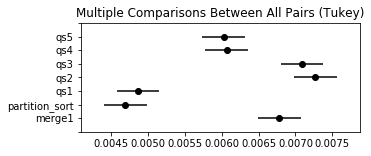

In [32]:
fig = posthoc.plot_simultaneous()
fig.set_size_inches((5, 2))
plt.show()
